### Data Cleaning

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

### Load Dataset

In [2]:
# Load raw file
data = pd.read_csv('../data/raw/water_potability.csv')

### Explore Data

In [3]:
print(data.shape)
display(data.head())

(3276, 10)


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [17]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [18]:
#Let's see the skewness of the columns
data.drop('Potability', axis=1).skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>]], dtype=object)

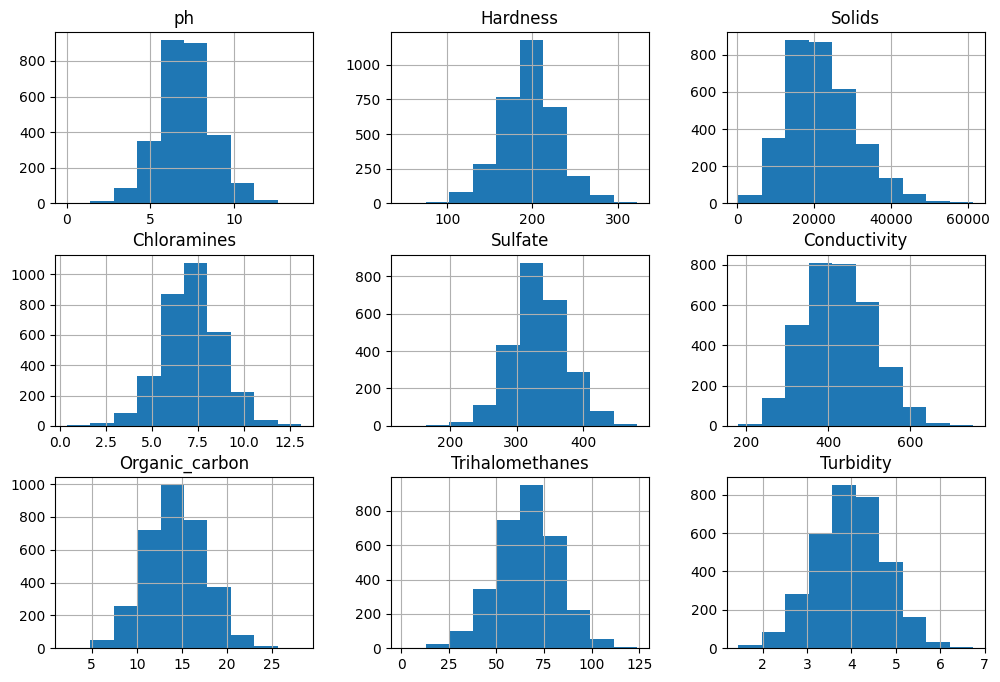

In [19]:
# Univariate Analysis
data.drop('Potability', axis=1).hist(figsize=(12,8))

- The features have very close to normal distribution.
- Solids have slightly right skewness.

In [9]:
def plot_continuous_in_boxplot(df: pd.DataFrame):
    '''
    
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns

    for column in df.columns:
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        sns.boxplot(data=df, x=column, ax=ax_box)
        sns.histplot(data=df, x=column, ax=ax_hist)
        plt.show()
    

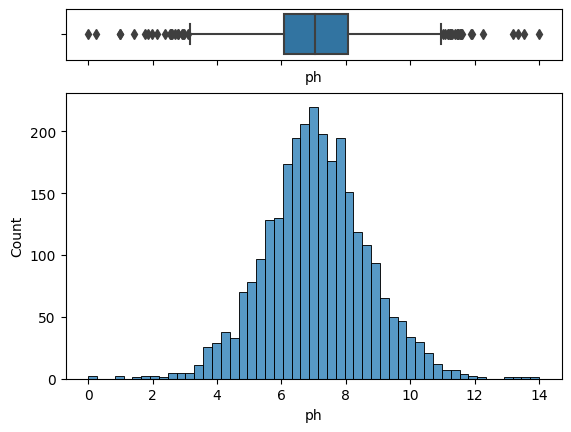

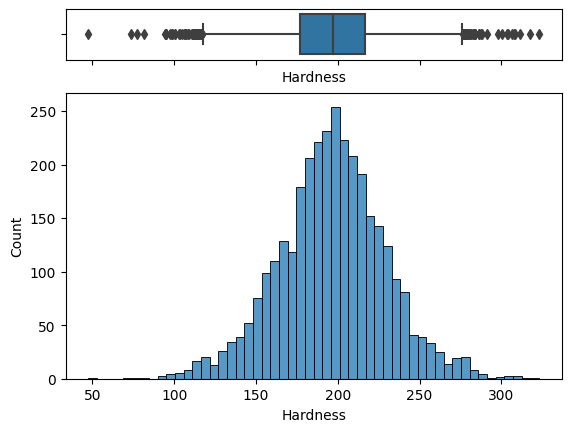

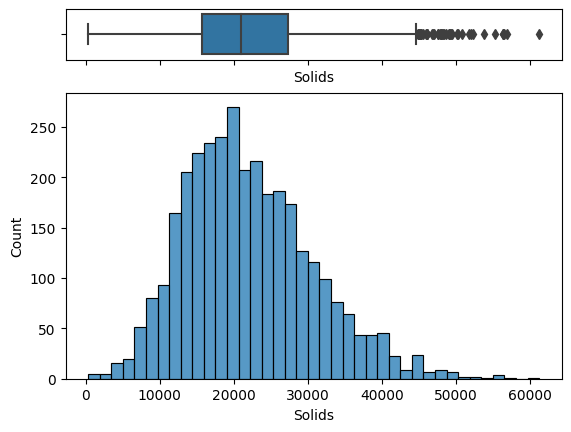

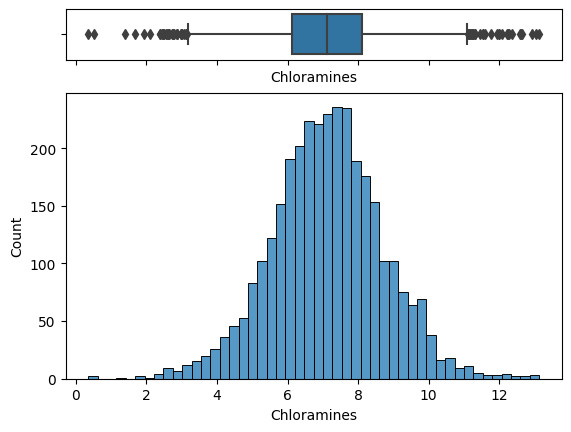

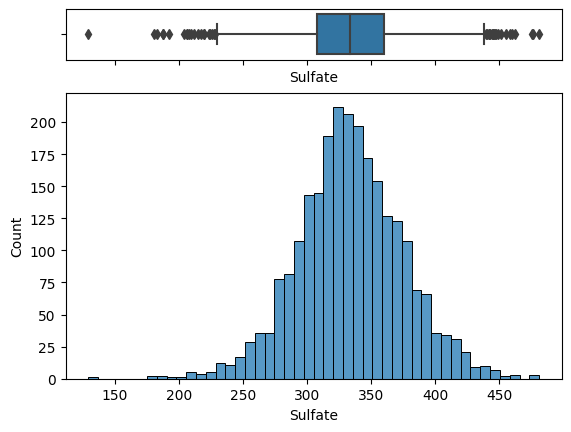

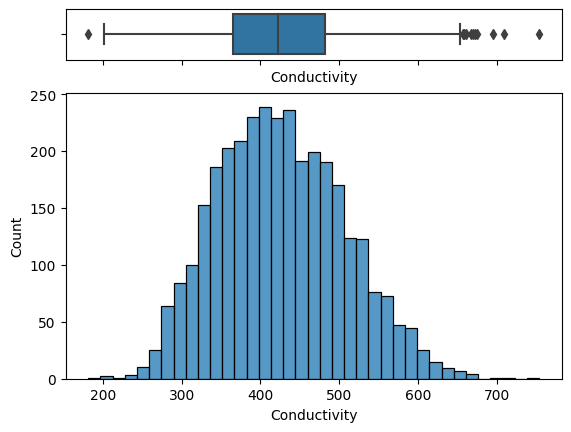

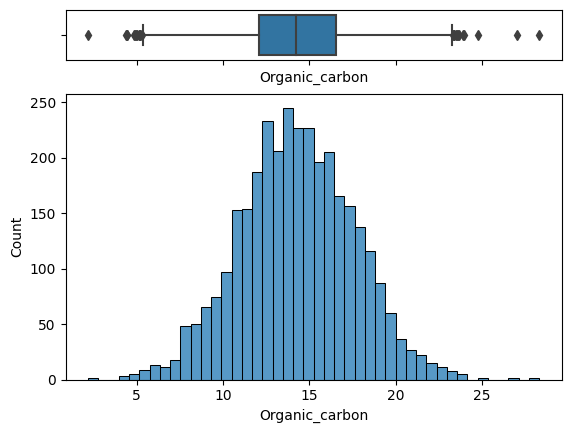

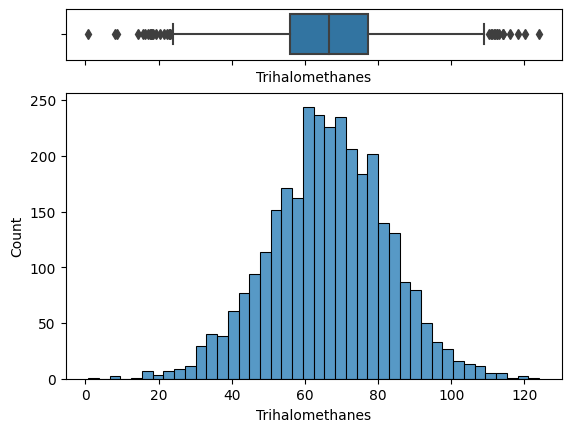

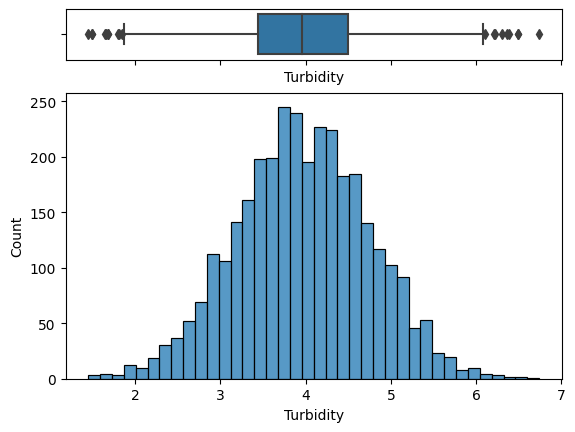

In [10]:
# Plot continuous variables in a histogram + boxplot
df = data.drop('Potability', axis=1)
plot_continuous_in_boxplot(df)

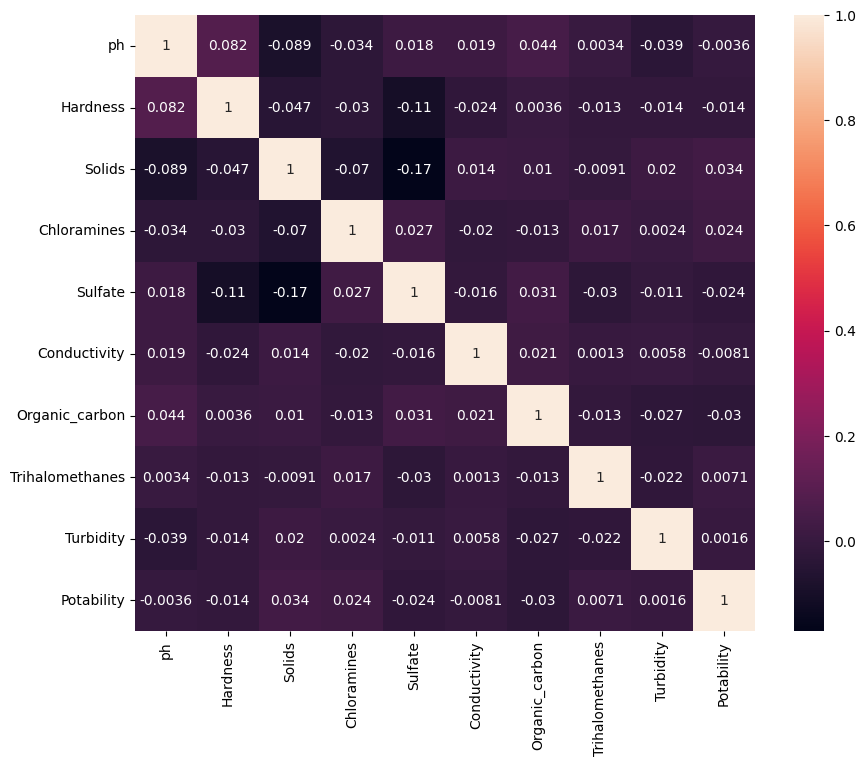

In [11]:
# Bivariate Analysis
corr_matrix=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

The correlation between all features is small.

### Data Distribution and Visualizations of Features

Potability
0    7.085378
1    7.073783
Name: ph, dtype: float64

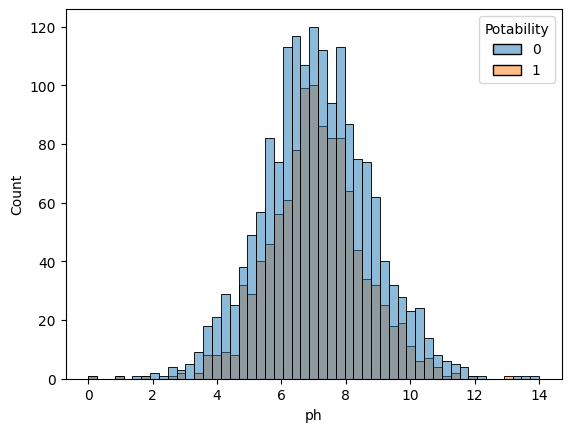

In [6]:
#Create a histogram to display the distribution of "ph" values
sns.histplot(data=data, x="ph", hue="Potability")
plt.savefig("../Images/ph_distribution.png", dpi=300, bbox_inches='tight')
#Calculate the mean value of "ph" column for each unique value in the "Potability" column 
data.groupby(["Potability"])['ph'].mean()

In [20]:
from scipy.stats import ttest_ind

# Split the 'ph' data based on 'Potability'
group_0 = data[data["Potability"] == 0]['ph']
group_1 = data[data["Potability"] == 1]['ph']

# Conduct the t-test
t_stat, p_value = ttest_ind(group_0.dropna(), group_1.dropna())  # .dropna() ensures NaN values are excluded

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic: 0.1876192924409459
P-value: 0.8511887790851168
Fail to reject the null hypothesis: There is no significant difference between the means.


Potability
0    196.733292
1    195.800744
Name: Hardness, dtype: float64

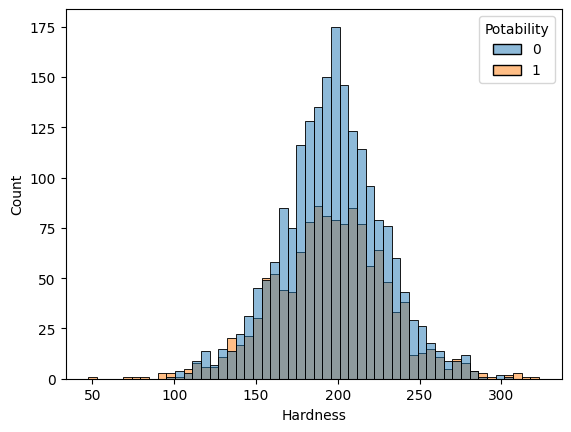

In [7]:
#Create a histogram to display the distribution of "Hardness" values
sns.histplot(data=data, x="Hardness", hue="Potability")
plt.savefig("../Images/Hardness_distribution.png", dpi=300, bbox_inches='tight')
#Calculate the mean value of "Hardness" column for each unique value in the "Potability" column
data.groupby(["Potability"])['Hardness'].mean()

In [15]:
# Split the 'Hardness' data based on 'Potability'
group_0 = data[data["Potability"] == 0]['Hardness']
group_1 = data[data["Potability"] == 1]['Hardness']

# Conduct the t-test
t_stat, p_value = ttest_ind(group_0.dropna(), group_1.dropna())  # .dropna() ensures NaN values are excluded

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic: 0.7917881267437834
P-value: 0.42854158740864634
Fail to reject the null hypothesis: There is no significant difference between the means.


Potability
0    21777.490788
1    22383.991018
Name: Solids, dtype: float64

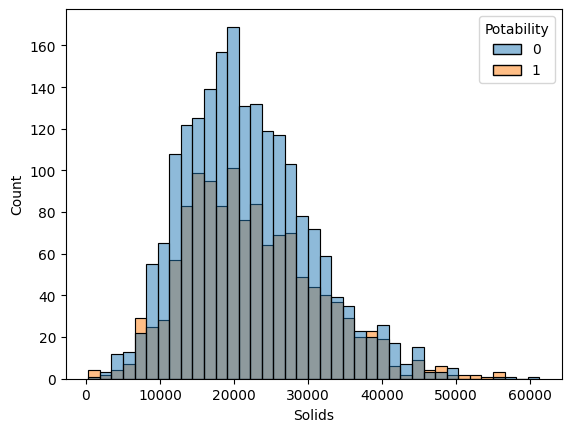

In [8]:
#Create a histogram to display the distribution of "Solids" values
sns.histplot(data=data, x="Solids", hue="Potability")
plt.savefig("../Images/Solids_distribution.png", dpi=300, bbox_inches='tight')
#Calculate the mean value of "Solids" column for each unique value in the "Potability" column
data.groupby(["Potability"])['Solids'].mean()

In [17]:
# Split the 'Solids' data based on 'Potability'
group_0 = data[data["Potability"] == 0]['Solids']
group_1 = data[data["Potability"] == 1]['Solids']

# Conduct the t-test
t_stat, p_value = ttest_ind(group_0.dropna(), group_1.dropna())  # .dropna() ensures NaN values are excluded

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic: -1.9318546614311165
P-value: 0.053463638184504905
Fail to reject the null hypothesis: There is no significant difference between the means.


Potability
0    7.092175
1    7.169338
Name: Chloramines, dtype: float64

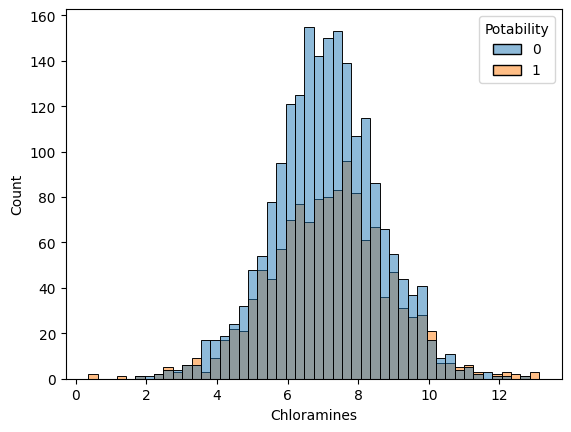

In [9]:
#Create a histogram to display the distribution of "Chloramines" values
sns.histplot(data=data, x="Chloramines", hue="Potability")
plt.savefig("../Images/Chloramines_distribution.png", dpi=300, bbox_inches='tight')
#Calculate the mean value of "Chloramines" column for each unique value in the "Potability" column
data.groupby(["Potability"])['Chloramines'].mean()

In [21]:
# Split the 'Solids' data based on 'Potability'
group_0 = data[data["Potability"] == 0]['Chloramines']
group_1 = data[data["Potability"] == 1]['Chloramines']

# Conduct the t-test
t_stat, p_value = ttest_ind(group_0.dropna(), group_1.dropna())  # .dropna() ensures NaN values are excluded

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic: -1.3609909310456154
P-value: 0.17361022465074655
Fail to reject the null hypothesis: There is no significant difference between the means.


Potability
0    334.56429
1    332.56699
Name: Sulfate, dtype: float64

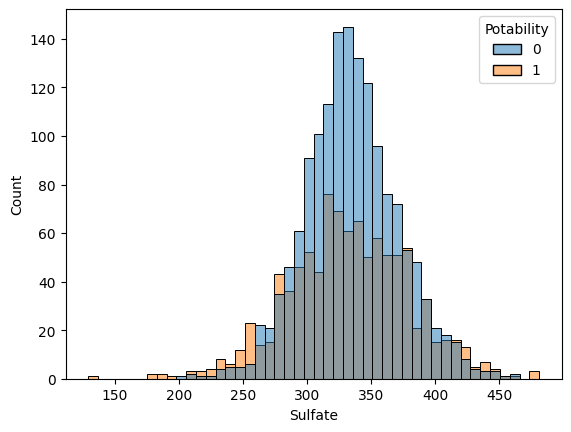

In [11]:
#Create a histogram to display the distribution of "Sulfate" values
sns.histplot(data=data, x="Sulfate", hue="Potability")
plt.savefig("../Images/Sulfate_distribution.png", dpi=300, bbox_inches='tight')
#Calculate the mean value of "Sulfate" column for each unique value in the "Potability" column
data.groupby(["Potability"])['Sulfate'].mean()

In [21]:
# Split the 'Sulfate' data based on 'Potability'
group_0 = data[data["Potability"] == 0]['Sulfate']
group_1 = data[data["Potability"] == 1]['Sulfate']

# Conduct the t-test
t_stat, p_value = ttest_ind(group_0.dropna(), group_1.dropna())  # .dropna() ensures NaN values are excluded

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic: 1.177527785585221
P-value: 0.23909731406212906
Fail to reject the null hypothesis: There is no significant difference between the means.


Potability
0    426.730454
1    425.383800
Name: Conductivity, dtype: float64

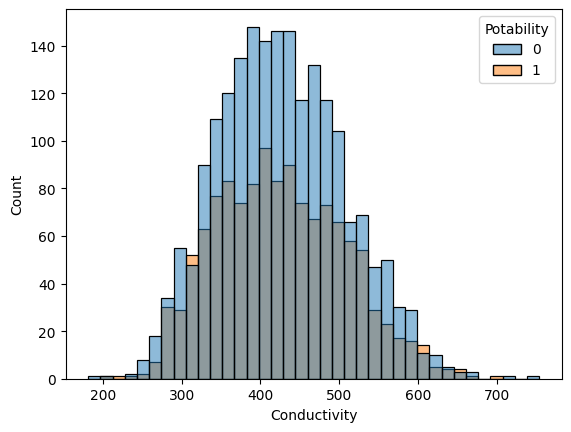

In [12]:
#Create a histogram to display the distribution of "Conductivity" values
sns.histplot(data=data, x="Conductivity", hue="Potability")
plt.savefig("../Images/Conductivity_distribution.png", dpi=300, bbox_inches='tight')
#Calculate the mean value of "Conductivity" column for each unique value in the "Potability" column
data.groupby(["Potability"])['Conductivity'].mean()

In [23]:
# Split the 'Conductivity' data based on 'Potability'
group_0 = data[data["Potability"] == 0]['Conductivity']
group_1 = data[data["Potability"] == 1]['Conductivity']

# Conduct the t-test
t_stat, p_value = ttest_ind(group_0.dropna(), group_1.dropna())  # .dropna() ensures NaN values are excluded

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic: 0.46510869954438294
P-value: 0.6418845485973537
Fail to reject the null hypothesis: There is no significant difference between the means.


Potability
0    14.364335
1    14.160893
Name: Organic_carbon, dtype: float64

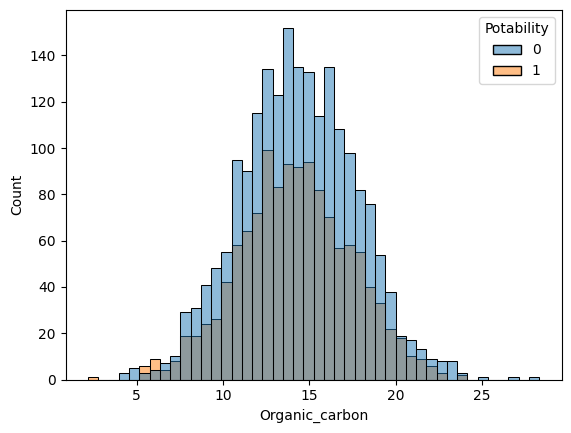

In [13]:
#Create a histogram to display the distribution of "Organic_carbon" values
sns.histplot(data=data, x="Organic_carbon", hue="Potability")
plt.savefig("../Images/Organic_carbon_distribution.png", dpi=300, bbox_inches='tight')
#Calculate the mean value of "Organic_carbon" column for each unique value in the "Potability" column
data.groupby(["Potability"])['Organic_carbon'].mean()

In [25]:
# Split the 'Organic_carbon' data based on 'Potability'
group_0 = data[data["Potability"] == 0]['Organic_carbon']
group_1 = data[data["Potability"] == 1]['Organic_carbon']

# Conduct the t-test
t_stat, p_value = ttest_ind(group_0.dropna(), group_1.dropna())  # .dropna() ensures NaN values are excluded

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic: 1.7174176183949887
P-value: 0.08599746163873831
Fail to reject the null hypothesis: There is no significant difference between the means.


Potability
0    66.303555
1    66.539684
Name: Trihalomethanes, dtype: float64

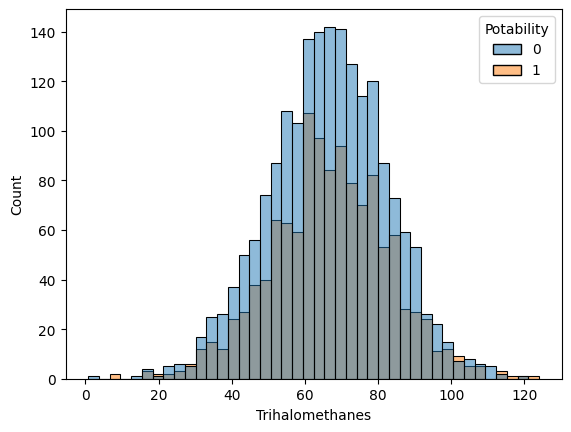

In [14]:
#Create a histogram to display the distribution of "Trihalomethanes" values
sns.histplot(data=data, x="Trihalomethanes", hue="Potability")
plt.savefig("../Images/Trihalomethanes_distribution.png", dpi=300, bbox_inches='tight')
#Calculate the mean value of "Trihalomethanes" column for each unique value in the "Potability" column
data.groupby(["Potability"])['Trihalomethanes'].mean()

In [27]:
# Split the 'Trihalomethanes' data based on 'Potability'
group_0 = data[data["Potability"] == 0]['Trihalomethanes']
group_1 = data[data["Potability"] == 1]['Trihalomethanes']

# Conduct the t-test
t_stat, p_value = ttest_ind(group_0.dropna(), group_1.dropna())  # .dropna() ensures NaN values are excluded

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic: -0.39778169731953955
P-value: 0.6908183933766601
Fail to reject the null hypothesis: There is no significant difference between the means.


Potability
0    3.965800
1    3.968328
Name: Turbidity, dtype: float64

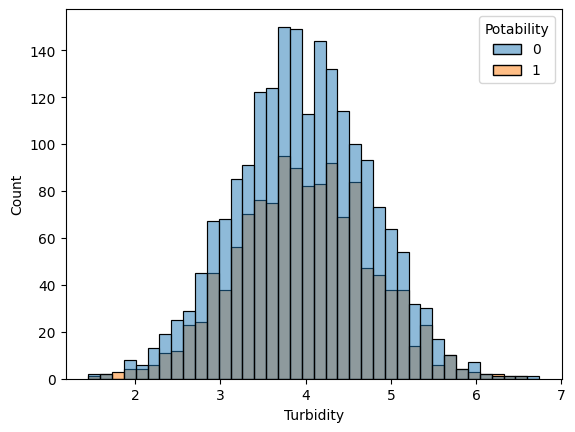

In [15]:
#Create a histogram to display the distribution of "Turbidity" values
sns.histplot(data=data, x="Turbidity", hue="Potability")
plt.savefig("../Images/Turbidity_distribution.png", dpi=300, bbox_inches='tight')
#Calculate the mean value of "Turbidity" column for each unique value in the "Potability" column
data.groupby(["Potability"])['Turbidity'].mean()

In [29]:
# Split the 'Turbidity' data based on 'Potability'
group_0 = data[data["Potability"] == 0]['Turbidity']
group_1 = data[data["Potability"] == 1]['Turbidity']

# Conduct the t-test
t_stat, p_value = ttest_ind(group_0.dropna(), group_1.dropna())  # .dropna() ensures NaN values are excluded

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic: -0.0904449608750201
P-value: 0.9279391620838058
Fail to reject the null hypothesis: There is no significant difference between the means.


### Dealing with Missing Values

In [4]:
# Check null values
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
# Finding the percentage of null values
(data.isnull().sum()/len(data)) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [6]:
# Drop the missing values across the whole dataframe
data_cleaned = data.dropna()
data_cleaned

ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
5       280.467916        8.399735        54.917862   2.559708           0  
6       283.651634       13.789695        84.603556   2.672989           0  
7       474.607645       12.363817        62.798309   4.401425           0  
...            ...             ...              ...        ...         ...  
3267    390.410231        9.899115        55.069304   4.613843           1  
3268    329.266002       16.217303        28.878601   3.442983           1  
3269    439.893618       16.172755        41.558501   4.369264           1  
3270    415.886955       12.067620        60.419921   3.669712           1  
3271    526.424171       13.894419        66.687695   4.435821           1  

[2011 rows x 10 columns]

In [7]:
# Check null values after dropping
data_cleaned.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Save the cleaned dataframe as CSV file

In [8]:
data_cleaned.to_csv('../data/clean/cleaned_df.csv', index=False)

### Split Features/ Target

In [9]:
# Separate the features from the target
y = data_cleaned['Potability']
X = data_cleaned.drop(['Potability'], axis=1)

### Train-Test Split

In [10]:
# Generate the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scale Columns

In [11]:
# Select StandardScaler
scaler = StandardScaler()

# Fit scaler with TRAIN data
scaler.fit(X_train)

# Scale X_train_num_transformed with fitted scaler. Output is a np.array.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add columns to np.array to create a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, 
                                 columns=X_train.columns, 
                                 index=X_train.index)

X_test_scaled_df = pd.DataFrame(X_test_scaled, 
                                columns=X_test.columns,
                                index=X_test.index)

### Model Selection

In [39]:
# Create models
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = KNeighborsClassifier()
model4 = AdaBoostClassifier()
model5 = GradientBoostingClassifier()


model_pipeline = [model1, model2, model3, model4, model5]
model_names = ['Logistic Regression', 'Random Forest Classifier', 'KNN', 'AdaBoostClassifier', 'GradientBoostingClassifier']

scores = {}

for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_scaled_df, y_train, cv=5))
    scores[model_name] = mean_score

print(scores)

{'Logistic Regression': 0.605550087075036, 'Random Forest Classifier': 0.6631079478054567, 'KNN': 0.6069988137603796, 'AdaBoostClassifier': 0.5806289593902224, 'GradientBoostingClassifier': 0.6360894475152066}


Based on the scores of each model, we can see that the best performing model is Random Forest Classifier.

### Model Building

In [58]:
from sklearn.metrics import cohen_kappa_score, make_scorer

# parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf' : [10, 20],
    'max_depth':[5, 10, 20],
}

kappa_scorer = make_scorer(cohen_kappa_score)
rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5,return_train_score=True, scoring=kappa_scorer)
grid_search.fit(X_train_scaled_df,y_train)
grid_search.best_params_ #To check the best set of parameters returned

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 150}

In [59]:
grid_search.best_score_

0.24548398129908575

In [60]:
from sklearn.metrics import precision_score, make_scorer

# parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf' : [10, 20],
    'max_depth':[5, 10, 20],
}

# Create a custom scorer for precision
precision_scorer = make_scorer(precision_score)

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True, scoring=precision_scorer)
grid_search.fit(X_train_scaled_df,y_train)
print(grid_search.best_params_)  # To check the best set of parameters returned


{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 15, 'n_estimators': 150}


In [61]:
grid_search.best_score_

0.755426406926407

In [12]:
from sklearn.metrics import precision_score

clf = RandomForestClassifier(max_depth=20,
                             min_samples_split=5,
                             min_samples_leaf=10,
                             n_estimators=50,
                             bootstrap=False,
                             max_features='sqrt',
                             criterion='gini')

clf.fit(X_train_scaled_df, y_train)

# Predictions
y_train_pred = clf.predict(X_train_scaled_df)
y_test_pred = clf.predict(X_test_scaled_df)

# Compute precision for train and test sets
train_precision = precision_score(y_train, y_train_pred) # pos=0/1
test_precision = precision_score(y_test, y_test_pred)

print("The Precision for the Random Forest in the TRAIN set is {:.2f}".format(train_precision))
print("The Precision for the Random Forest in the TEST  set is {:.2f}".format(test_precision))

display(y_test.value_counts())
display(confusion_matrix(y_test, y_test_pred))


The Precision for the Random Forest in the TRAIN set is 0.98
The Precision for the Random Forest in the TEST  set is 0.70


Potability
0    355
1    249
Name: count, dtype: int64

array([[309,  46],
       [143, 106]])

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       355
           1       0.66      0.41      0.51       249

    accuracy                           0.67       604
   macro avg       0.66      0.63      0.63       604
weighted avg       0.67      0.67      0.65       604



### Feature Importance Rank

In [70]:
# Get the feature importances
rf_importances = list(zip(clf.feature_importances_, data.columns))
rf_importances.sort(reverse=True)
# Print the feature rankings
rf_importances

[(0.20805893115547558, 'Sulfate'),
 (0.20129584946577042, 'ph'),
 (0.12036392519532542, 'Chloramines'),
 (0.10572781036359755, 'Solids'),
 (0.1054024969701938, 'Hardness'),
 (0.07493449753586807, 'Trihalomethanes'),
 (0.06205092476839999, 'Turbidity'),
 (0.061179233220966064, 'Organic_carbon'),
 (0.06098633132440314, 'Conductivity')]

In [ ]:
#y_pred = clf.predict(X_test_scaled_df)
#y_pred_df = pd.DataFrame(y_pred, columns=['Potability'], index=X_test_scaled_df.index)
#y_pred_df

### Let's try to change the features of the dataset

### PCA

In [102]:
from sklearn.decomposition import PCA

# X1,...,X9
# PCA1(X1,...X9),....,PCA9(X1,...X9)
# PCA1 -> var1, PCA2 -> var2,....
pca = PCA()
pca.fit(X_train_scaled_df)
print(pca.explained_variance_ratio_)

[0.13169889 0.12972615 0.1165734  0.11384758 0.11045734 0.10850414
 0.10543653 0.09488549 0.08887047]


In [105]:
total_variances = []
total = 0
for index, variance in enumerate(pca.explained_variance_ratio_):
    total += round(variance*100,1)
    total_variances.append((index+1, total))

total_variances

[(1, 13.2),
 (2, 26.2),
 (3, 37.9),
 (4, 49.3),
 (5, 60.3),
 (6, 71.2),
 (7, 81.7),
 (8, 91.2),
 (9, 100.10000000000001)]

In [112]:
pd.DataFrame(pca.components_, 
             columns=["X_" + str(i+1) for i in range(X.shape[1])],
             index = ["PCA_" + str(i+1) for i in range(X.shape[1])])

X_1       X_2       X_3       X_4       X_5       X_6       X_7  \
PCA_1 -0.638096 -0.574635  0.399121  0.205991 -0.014549  0.023212 -0.120634   
PCA_2 -0.017415  0.309661  0.564685 -0.150015 -0.706863  0.107534  0.043778   
PCA_3 -0.087215 -0.092790  0.089904 -0.399248  0.154751  0.505052  0.643025   
PCA_4 -0.248483  0.083061  0.101155 -0.027784  0.066763 -0.572702  0.117137   
PCA_5 -0.042801  0.323452 -0.058352  0.184795 -0.197737  0.139361 -0.295991   
PCA_6  0.025502  0.102575 -0.032761  0.852027 -0.054903  0.209004  0.418872   
PCA_7  0.039867 -0.189319 -0.078919  0.001127  0.009455  0.556507 -0.515390   
PCA_8  0.701308 -0.343855  0.533699  0.114252  0.151647 -0.114698 -0.029719   
PCA_9  0.165150 -0.537750 -0.456044 -0.041685 -0.637595 -0.137378  0.163569   

            X_8       X_9  
PCA_1 -0.033027  0.210958  
PCA_2  0.172681 -0.139564  
PCA_3 -0.350657 -0.028894  
PCA_4 -0.431902 -0.622613  
PCA_5 -0.759657  0.364394  
PCA_6  0.048842 -0.193050  
PCA_7 -0.070206 -0.613184  
PCA_8 -0.232188  0.033088  
PCA_9 -0.145900 -0.019904

In [116]:
pd.DataFrame(pca.transform(X_train_scaled_df), 
             columns=["PCA_" + str(i+1) for i in range(X.shape[1])],
             index=X_train_scaled_df.index)

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
904   0.652800 -1.183253  1.157174  0.037385 -0.493888 -0.445751 -0.005436   
1729 -0.880406  1.022198 -0.814392  0.331125 -0.573607  1.017215  1.709154   
3047  0.677373 -0.148068  0.076274  0.358442  0.368308 -0.042133  1.837149   
2206 -1.808731 -0.702735  1.948697  0.672459  0.361705 -2.469293  0.249483   
2131 -0.859948 -0.582400 -0.790493  1.207713  0.985740 -0.189104 -1.010787   
...        ...       ...       ...       ...       ...       ...       ...   
1841  0.396267 -0.471545  1.435416 -0.000147 -0.162219  0.380799  1.210046   
2113  0.180155 -1.369939 -0.098614  0.193740  0.291142  0.589044  1.607041   
1401 -1.101094 -2.430111 -0.650995  0.451239 -0.346121 -1.189441 -0.660078   
2376 -1.474640  0.837764 -0.436206 -0.828749 -3.319515  0.993011  0.136029   
1834  0.745083 -1.667207 -0.625400 -0.624461 -0.648227 -1.678144 -0.592033   

         PCA_8     PCA_9  
904  -0.368564  0.328076  
1729 -2.521533  0.167049  
3047 -1.068354 -0.411447  
2206  0.830226 -1.269564  
2131 -0.234055  0.132092  
...        ...       ...  
1841  1.189693  0.399468  
2113 -0.323527 -0.261789  
1401 -0.261497 -0.568399  
2376 -1.138737  0.051329  
1834  0.151068  0.307314  

[1407 rows x 9 columns]

### TSNE

In [121]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  perplexity=30).fit_transform(X_train_scaled_df)

X_embedded_df = pd.DataFrame(X_embedded, columns=["tsne_1","tsne_2"])
X_embedded_df

tsne_1     tsne_2
0      0.195634  17.599377
1     -6.170762 -17.793560
2     -4.624516  10.942079
3     27.112459 -14.557117
4    -34.640259   7.102407
...         ...        ...
1402   5.251550  -5.909274
1403  -6.534627  13.160583
1404 -25.810488  16.241806
1405  28.012060  19.873169
1406   2.745194  30.095804

[1407 rows x 2 columns]

In [122]:
X_embedded_df["Potability"] = y_train
X_embedded_df

tsne_1     tsne_2  Potability
0      0.195634  17.599377         NaN
1     -6.170762 -17.793560         NaN
2     -4.624516  10.942079         NaN
3     27.112459 -14.557117         0.0
4    -34.640259   7.102407         0.0
...         ...        ...         ...
1402   5.251550  -5.909274         NaN
1403  -6.534627  13.160583         NaN
1404 -25.810488  16.241806         0.0
1405  28.012060  19.873169         NaN
1406   2.745194  30.095804         0.0

[1407 rows x 3 columns]

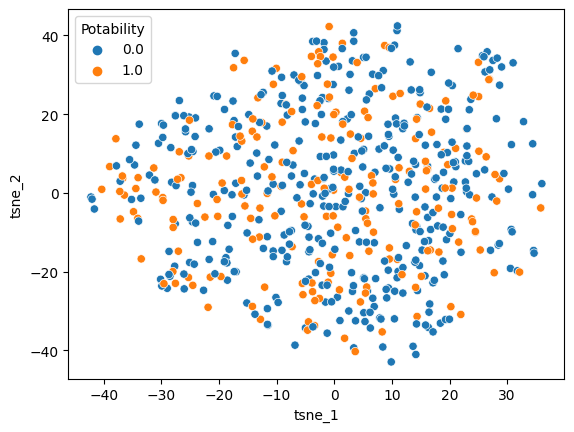

In [123]:
X_embedded_df = X_embedded_df.dropna()

fig. ax = plt.subplots()
sns.scatterplot(data=X_embedded_df, x="tsne_1", y="tsne_2", hue="Potability")

plt.show()